# Hirarchical (Agglomerartive) clustering for image data

In [8]:
import time as time

import numpy as np
from scipy.ndimage.filters import gaussian_filter
import pandas as pd

import matplotlib.pyplot as plt

import skimage
from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering

In [28]:
from sklearn.utils.fixes import _parse_version

In [4]:
data = coins()

In [5]:
data

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

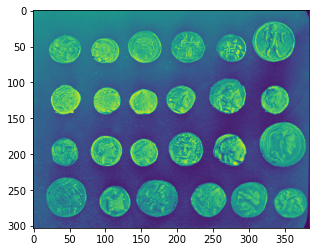

In [6]:
plt.imshow(data)

In [29]:
if _parse_version(skimage.__version__) >= _parse_version('0.14'):  #  for compactibility use
    rescale_params = {'anti_aliasing':False, 'multichannel': False}
else:
    rescale_params = {}

In [8]:
# we have apply Gaussian filter for smoothing prior to down-scaling
smoothened_coins = gaussian_filter(data,sigma=2)
# we have to apply Rescale the data
rescale_coins = rescale(smoothened_coins,0.2,mode='reflect',**rescale_params)

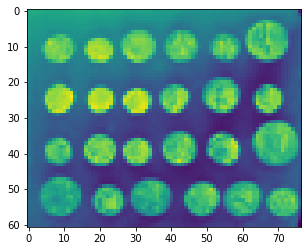

In [10]:
plt.imshow(rescale_coins)

In [20]:
X = np.reshape(rescale_coins,(-1,1))

In [21]:
conn = grid_to_graph(*rescale_coins.shape)

In [28]:
# compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 27
ward = AgglomerativeClustering(n_clusters=n_clusters,linkage='ward',
                               connectivity=conn)

Compute structured hierarchical clustering...


In [29]:
ward.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int32'>'
	with 23209 stored elements in COOrdinate format>,
                        distance_threshold=None, linkage='ward', memory=None,
                        n_clusters=27)

In [30]:
label =np.reshape(ward.labels_,rescale_coins.shape)
label

array([[1, 1, 1, ..., 1, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)

In [31]:
print("Elapsed time:", time.time() - st)
print("Number of pixels:",label.size)
print("Number of clusters:", np.unique(label).size)

Elapsed time: 2.893462657928467
Number of pixels: 4697
Number of clusters: 27


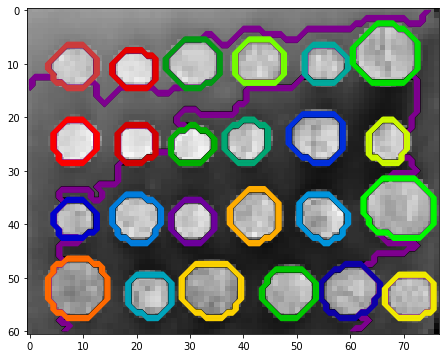

In [34]:
plt.figure(figsize=(16,6))
plt.imshow(rescale_coins,cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label==l,
              colors=[plt.cm.nipy_spectral(l/float(n_clusters))])
plt.xticks()
plt.yticks()
plt.show()

# Text data 

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Interview_Dataset/topics.csv")
df.head()

,id,topic,subject,Lables
0,1115,fcfs,Operating System,0
1,1923,dml,Database Management System,1
2,835,jdbc,Object_oriented_programing,2
3,1866,joints,Database Management System,1
4,1125,buffering,Operating System,0


In [10]:
df.tail()

,id,topic,subject,Lables
14,648,encapsulation,Object_oriented_programing,2
15,1771,transaction,Database Management System,1
16,127,Object,Object_oriented_programing,2
17,2383,sql,Database Management System,1
18,1376,keys,Database Management System,1


In [11]:
df.isnull().sum()

id         0
topic      0
subject    0
Lables     0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
d = df.apply(LabelEncoder().fit_transform)

In [14]:
d

,id,topic,subject,Lables
0,9,9,2,0
1,17,7,0,1
2,6,10,1,2
3,15,11,0,1
4,10,3,2,0
5,5,2,1,2
6,12,6,2,0
7,16,5,0,1
8,3,13,1,2
9,8,4,2,0


In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
agg = AgglomerativeClustering()

In [18]:
agg.fit(d)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [21]:
agg_labels = agg.labels_

In [20]:
d_pred  = agg.fit_predict(d)

In [22]:
agg_labels == d_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

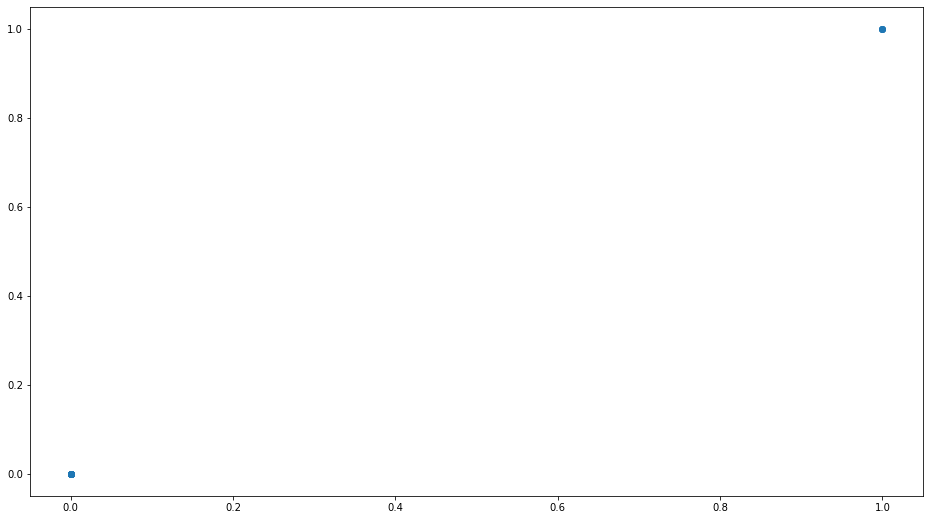

In [26]:
plt.figure(figsize=(16,9))
plt.scatter(d_pred,agg_labels)